## Data Skills Activity #1 - Reading time series
**Developed for the OOI Data Lab Notebook**

By Sage Lichtenwalner, March 6, 2020

This notebook was adapted from an earlier [Air/Sea Temperature](https://github.com/ooi-data-lab/blog-notebooks/blob/master/201901/Air%20and%20Sea%20Temps.ipynb) comparison example.

For this figure, I requested data for the instrument CP04OSSM-SBD11-06-METBKA000 using the [OOI Data Portal](https://ooinet.oceanobservatories.org).  If you prefer to do everything in code, you can also request data using the OOI API by following this [quick-start example](https://github.com/ooi-data-review/2018-data-workshops/blob/master/chemistry/examples/quickstart_python.ipynb).

In [ ]:
# Notebook Setup
import requests
import os
import re
import xarray as xr
import dask
! pip install netcdf4==1.5.0
import matplotlib.pyplot as plt
import numpy as np
import datetime 

# Setup default plot styles
import seaborn as sns
sns.set()

# Supress open_mfdataset warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Specify the THREDDS dataset directory provided in the email 
url = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20200306T174559125Z-CP04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument/catalog.html'

In [ ]:
# Now let's find all the data files we need
tds_url = 'https://opendap.oceanobservatories.org/thredds/dodsC'
datasets = requests.get(url).text
urls = re.findall(r'href=[\'"]?([^\'" >]+)', datasets)
x = re.findall(r'(ooi/.*?.nc)', datasets)
for i in x:
    if i.endswith('.nc') == False:
        x.remove(i)
for i in x:
    try:
        float(i[-4])
    except:
        x.remove(i)
datasets = [os.path.join(tds_url, i) for i in x]
selected_datasets = []
for d in datasets:
    if 'VELPT' in d:
        pass
    else:
        selected_datasets.append(d)

In [ ]:
# Open the dataset using xarray
ds = xr.open_mfdataset(selected_datasets)
ds = ds.swap_dims({'obs': 'time'}) # Swap the primary dimension
ds = ds.chunk({'time': 100}) # Used for optimization
ds = ds.sortby('time') # Data from different deployments can overlap so we want to sort all data by timestamp

In [ ]:
# Pull the source attribute to use as a plot title
source = ds.source
source

'CP04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument'

In [ ]:
# Subset and average
ds = ds[['air_temperature','sea_surface_temperature','met_salsurf']]
ds_hourly = ds.resample(time='1H').mean()
ds_daily = ds.resample(time='1D').mean()
ds_monthly = ds.resample(time='1MS').mean()

## Raw Data

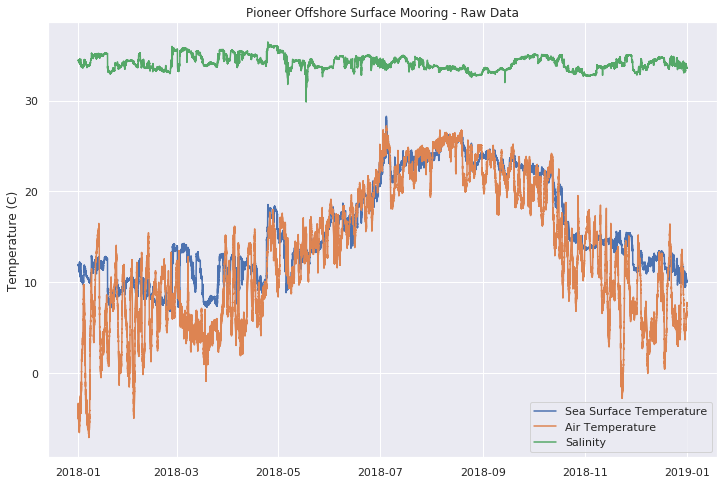

In [ ]:
# Raw Data
fig, (ax) = plt.subplots(1,1, figsize=(12,8))
plt.plot(ds['time'],ds['sea_surface_temperature'], label='Sea Surface Temperature')
plt.plot(ds['time'],ds['air_temperature'], label='Air Temperature')
plt.plot(ds['time'],ds['met_salsurf'], label='Salinity')
plt.ylabel('Temperature (C)')
plt.title('Pioneer Offshore Surface Mooring - Raw Data')
plt.legend();
plt.savefig('CP04_raw.png')

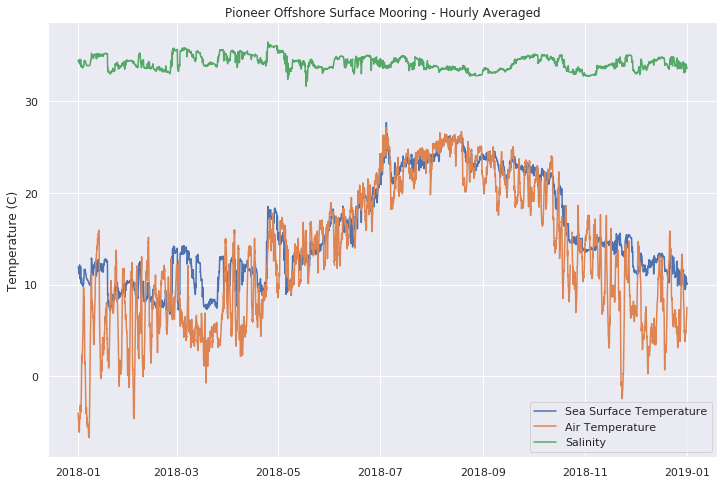

In [ ]:
# Hourly Data
fig, (ax) = plt.subplots(1,1, figsize=(12,8))
plt.plot(ds_hourly['time'],ds_hourly['sea_surface_temperature'], label='Sea Surface Temperature')
plt.plot(ds_hourly['time'],ds_hourly['air_temperature'], label='Air Temperature')
plt.plot(ds_hourly['time'],ds_hourly['met_salsurf'], label='Salinity')
plt.ylabel('Temperature (C)')
plt.title('Pioneer Offshore Surface Mooring - Hourly Averaged')
plt.legend();
plt.savefig('CP04_hourly.png')

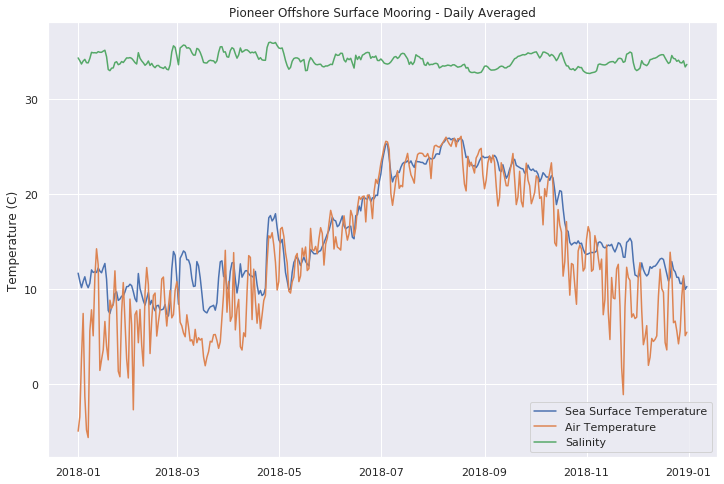

In [ ]:
# Daily Data
fig, (ax) = plt.subplots(1,1, figsize=(12,8))
plt.plot(ds_daily['time'],ds_daily['sea_surface_temperature'], label='Sea Surface Temperature')
plt.plot(ds_daily['time'],ds_daily['air_temperature'], label='Air Temperature')
plt.plot(ds_daily['time'],ds_daily['met_salsurf'], label='Salinity')
plt.ylabel('Temperature (C)')
plt.title('Pioneer Offshore Surface Mooring - Daily Averaged')
plt.legend();
plt.savefig('CP04_daily.png')

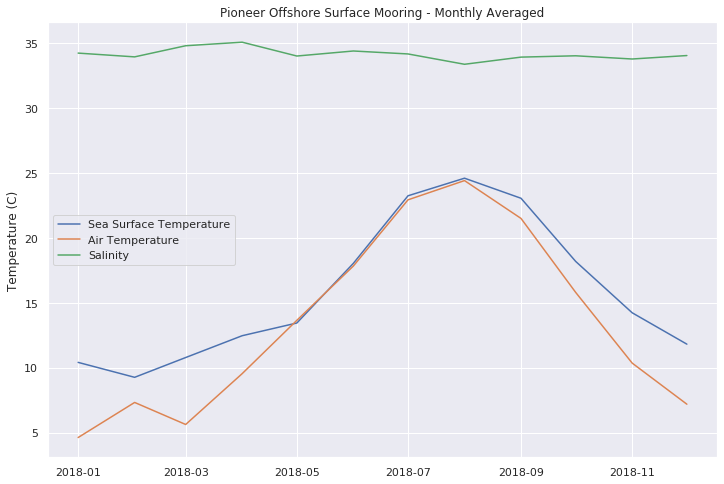

In [ ]:
# Monthly Data
fig, (ax) = plt.subplots(1,1, figsize=(12,8))
plt.plot(ds_monthly['time'],ds_monthly['sea_surface_temperature'], label='Sea Surface Temperature')
plt.plot(ds_monthly['time'],ds_monthly['air_temperature'], label='Air Temperature')
plt.plot(ds_monthly['time'],ds_monthly['met_salsurf'], label='Salinity')
plt.ylabel('Temperature (C)')
plt.title('Pioneer Offshore Surface Mooring - Monthly Averaged')
plt.legend();
plt.savefig('CP04_monthly.png')

## Export

In [ ]:
ds.to_dataframe().to_csv('CP04OSSM_MET_2019_raw.csv')
ds_hourly.to_dataframe().to_csv('CP04OSSM_MET_2019_hourly.csv')
ds_daily.to_dataframe().to_csv('CP04OSSM_MET_2019_daily.csv')
ds_monthly.to_dataframe().to_csv('CP04OSSM_MET_2019_monthly.csv')